In [1]:
import random
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 1 - Modeling

In [2]:
# Import data
df_train = pd.read_csv('scaled_train.csv', sep=';')
df_test = pd.read_csv('scaled_test.csv', sep=';')

In [3]:
# Use standard regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets by predicting the next days precipitation
regr.fit(df_train.drop('prec', axis=1), df_train['prec'])

# Make predictions using the testing set
y_pred = regr.predict(df_test.drop('prec', axis=1))

Coefficients: 
 [-4.44329912e-04  6.98451455e-01  2.22378472e-02 -2.32046091e-02
 -1.31089686e-01  4.32789491e-02 -7.45170178e-02  1.88243975e-01
 -4.39839315e-02  6.63070379e-02  3.31939540e-02  1.41505789e-01
  2.86982573e-02 -4.08621712e-02  4.26545854e-03 -3.22129924e-02
  3.05594202e-01 -1.67366377e-01 -2.84292350e-02 -2.97843340e-01
 -1.87666932e-01  1.80522854e-01 -4.53868748e-03  8.35937264e-03
 -8.71661573e-02 -3.22432842e-02 -4.83711026e-02]
Root mean squared error: 0.93
Variance score: 0.13


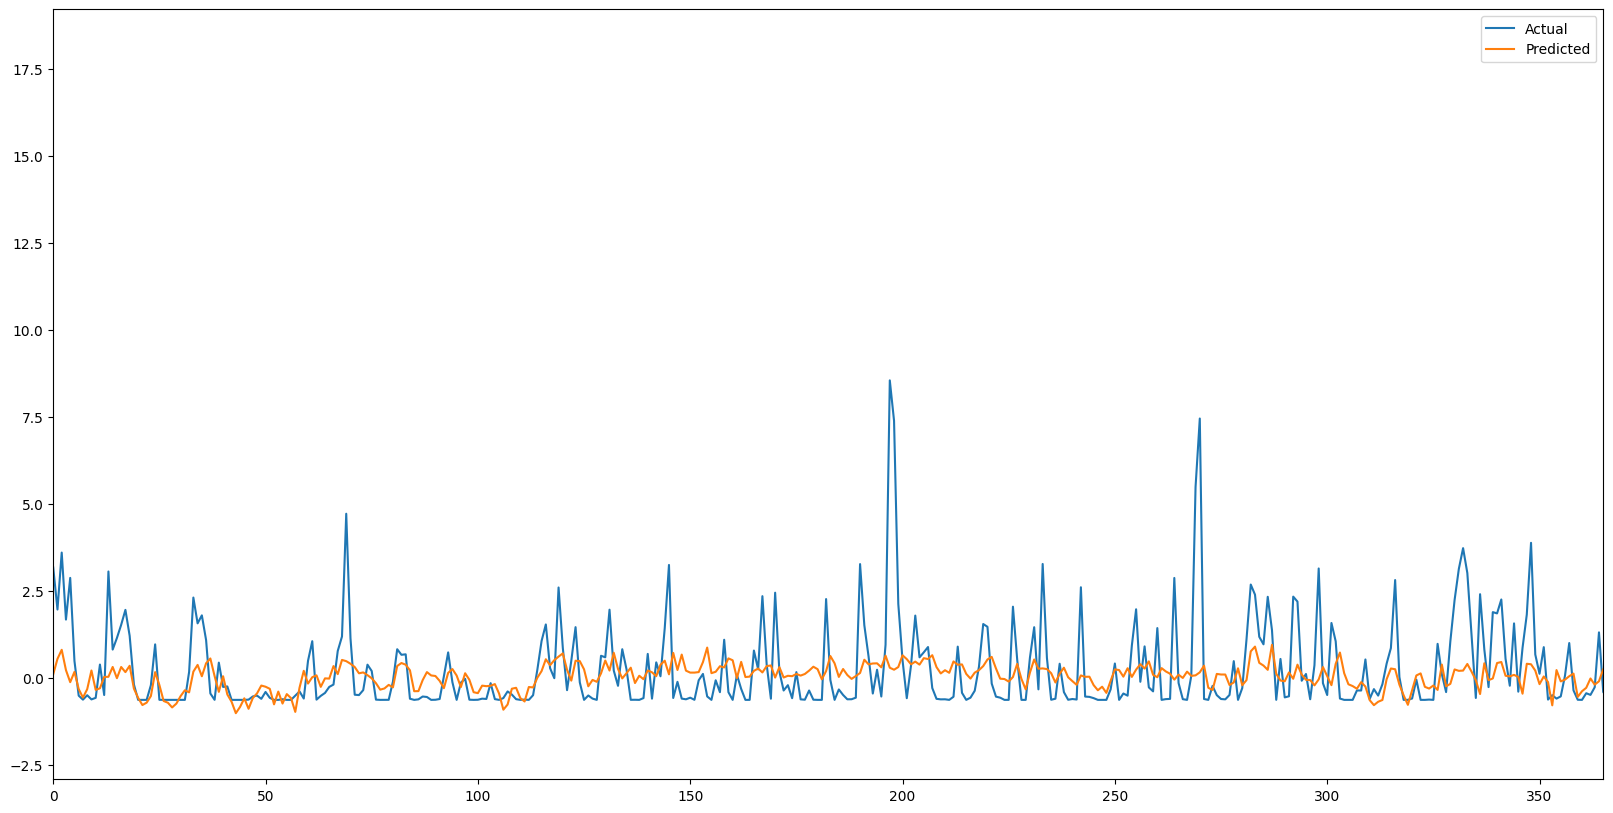

In [4]:
# The coefficients
print('Coefficients: \n', regr.coef_)

# The root mean squared error (RMSE), parameter squared=False gives the RMSE
print("Root mean squared error: %.2f"
      % mean_squared_error(df_test['prec'], y_pred, squared=False))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(df_test['prec'], y_pred))

# Plot predictions in time series plot compared to actual values
plt.figure(figsize=(20, 10))
plt.plot(df_test['prec'], label='Actual')
plt.plot(y_pred, label='Predicted')

# Only plot the first year
plt.xlim(0, 365)

plt.legend()

# Step 2 - Feature importance

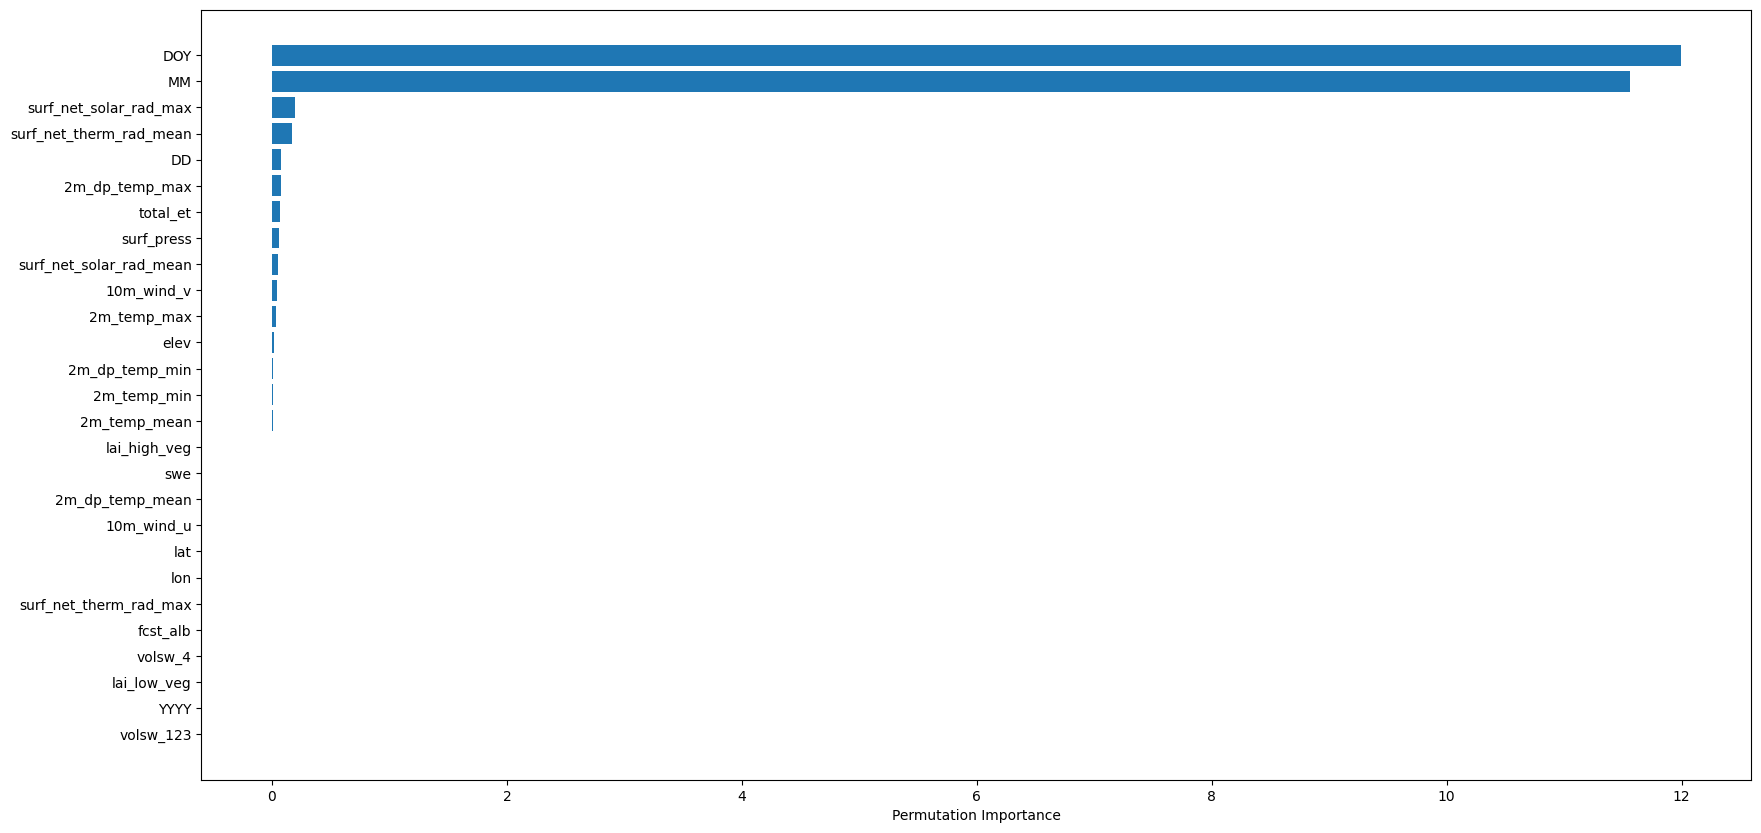

In [5]:
from sklearn.inspection import permutation_importance


perm_importance = permutation_importance(regr, df_test.drop('prec', axis=1), df_test['prec'], n_repeats=10, random_state=42)

# Sort the indices of the permutation importance values
sorted_idx = perm_importance.importances_mean.argsort()

# Plot the permutation importance values
plt.figure(figsize=(20, 10))
plt.barh(df_test.drop('prec', axis=1).columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

# Add the column names to the plot
plt.yticks(ticks=range(len(df_test.drop('prec', axis=1).columns)), labels=df_test.drop('prec', axis=1).columns[sorted_idx])
plt.show()


Feature: 0, Score: -0.00044
Feature: 1, Score: 0.69845
Feature: 2, Score: 0.02224
Feature: 3, Score: -0.02320
Feature: 4, Score: -0.13109
Feature: 5, Score: 0.04328
Feature: 6, Score: -0.07452
Feature: 7, Score: 0.18824
Feature: 8, Score: -0.04398
Feature: 9, Score: 0.06631
Feature: 10, Score: 0.03319
Feature: 11, Score: 0.14151
Feature: 12, Score: 0.02870
Feature: 13, Score: -0.04086
Feature: 14, Score: 0.00427
Feature: 15, Score: -0.03221
Feature: 16, Score: 0.30559
Feature: 17, Score: -0.16737
Feature: 18, Score: -0.02843
Feature: 19, Score: -0.29784
Feature: 20, Score: -0.18767
Feature: 21, Score: 0.18052
Feature: 22, Score: -0.00454
Feature: 23, Score: 0.00836
Feature: 24, Score: -0.08717
Feature: 25, Score: -0.03224
Feature: 26, Score: -0.04837


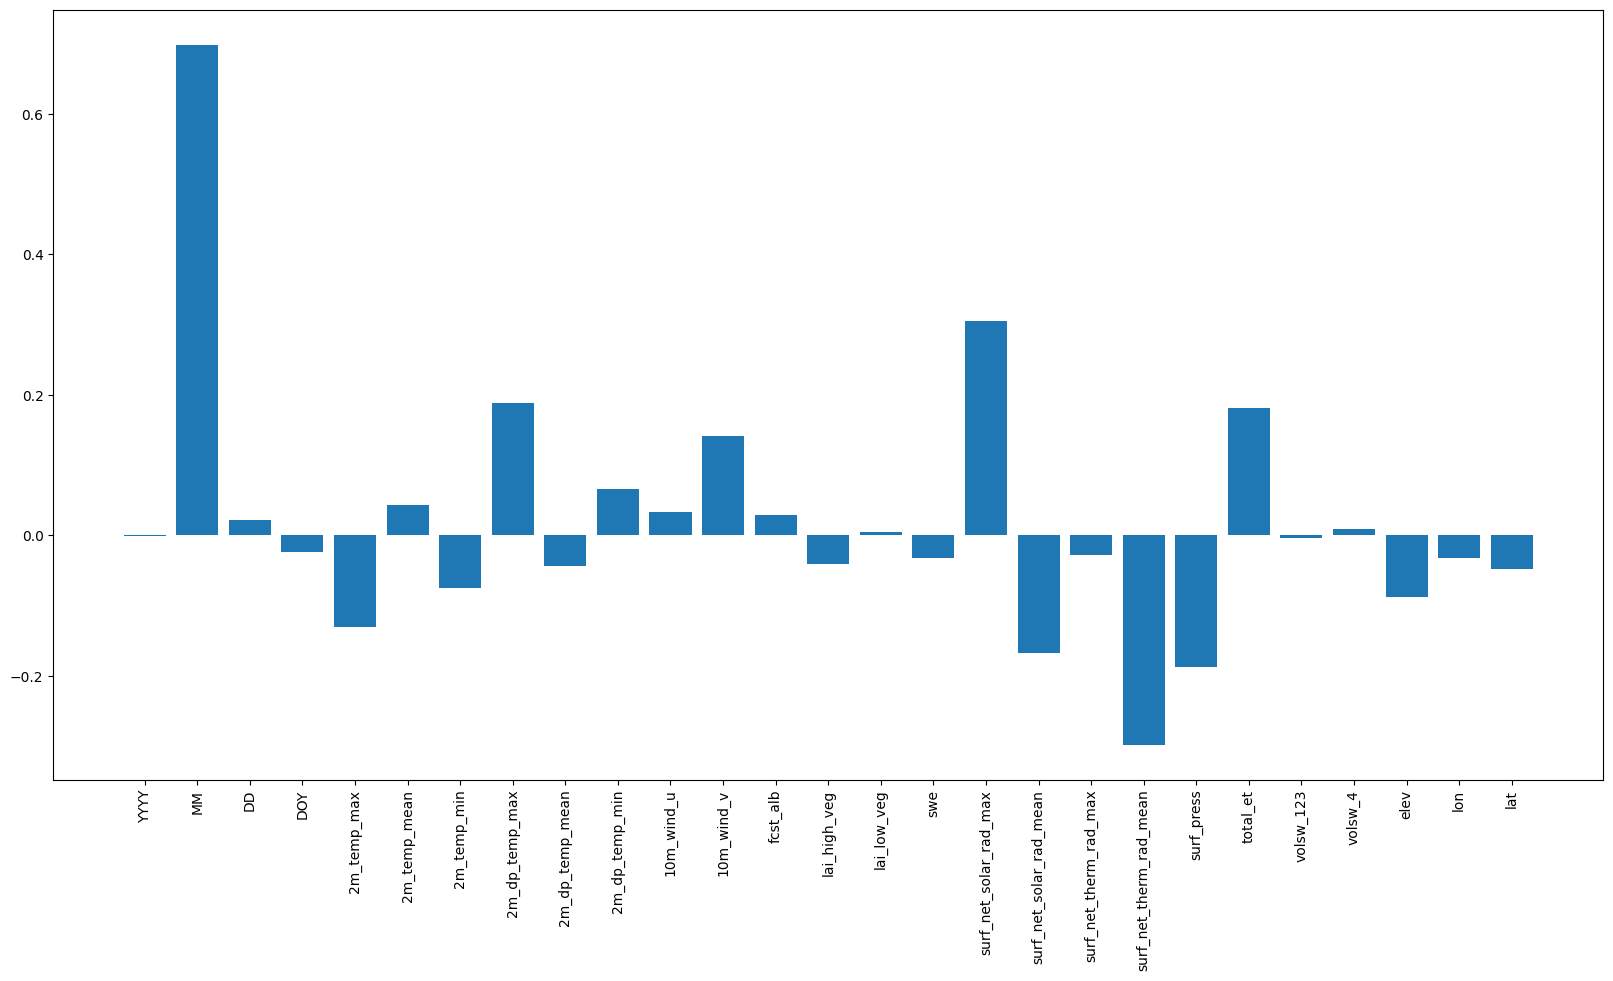

In [6]:
# Get feature importance
importance = regr.coef_

# Summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

# Plot feature importance by its index name
plt.figure(figsize=(20, 10))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))], df_train.drop('prec', axis=1).columns,  rotation='vertical')
plt.show()

# Export analysing data 

In [16]:
# Create empty dataframe
df = pd.DataFrame()

# Add column names
df['feature_names'] = df_train.drop('prec', axis=1).columns[sorted_idx]

# Add feature names and importance to dataframe
df['feature_importance_values'] = perm_importance.importances_mean[sorted_idx]

# Add priority of column names
df['original_order'] = perm_importance.importances_mean.argsort()

# Add root mean squared error
df['rmse'] = mean_squared_error(df_test['prec'], y_pred, squared=False)

df.head()

,feature_names,feature_importance_values,original_order,rmse
0,volsw_123,-0.000123,22,0.934819
1,YYYY,0.000049,0,0.934819
2,lai_low_veg,0.000106,14,0.934819
3,volsw_4,0.000450,23,0.934819
4,fcst_alb,0.000725,12,0.934819


### Export to csv file

In [17]:
df.to_csv('regression_model_feature_importance.csv', sep=';', index=False)
